In [42]:
#requirements
!pip install scikit-learn numpy pandas matplotlib seaborn

In [47]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier



## Step 1- Data Processing
Are there any missing values? What are your features? Are you keeping every feature?


In [44]:
data = "MP2_Data.csv"
df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           107 non-null    object 
 1   Week2_Quiz1  107 non-null    float64
 2   Week3_MP1    107 non-null    float64
 3   Week3_PR1    107 non-null    float64
 4   Week5_MP2    107 non-null    float64
 5   Week5_PR2    107 non-null    float64
 6   Week7_MP3    107 non-null    float64
 7   Week7_PR3    107 non-null    float64
 8   Week4_Quiz2  107 non-null    float64
 9   Week6_Quiz3  107 non-null    float64
 10  Week8_Total  107 non-null    float64
 11  Week1_Stat0  107 non-null    int64  
 12  Week1_Stat1  107 non-null    int64  
 13  Week1_Stat2  107 non-null    int64  
 14  Week1_Stat3  107 non-null    int64  
 15  Week2_Stat0  107 non-null    int64  
 16  Week2_Stat1  107 non-null    int64  
 17  Week2_Stat2  107 non-null    int64  
 18  Week2_Stat3  107 non-null    int64  
 19  Week3_St

In [45]:
# make dataframes which i can plot
df_cumsum= df.copy()
df_cumsum =df_cumsum.drop(df_cumsum.columns[:11],axis=1)
mean_df = df_cumsum.groupby("Grade").mean()
df_stat0 = mean_df.filter(like="Stat0").cumsum(axis=1)
df_stat1 = mean_df.filter(like="Stat1").cumsum(axis=1)
df_stat2 = mean_df.filter(like="Stat2").cumsum(axis=1)
df_stat3 = mean_df.filter(like="Stat3").cumsum(axis=1)


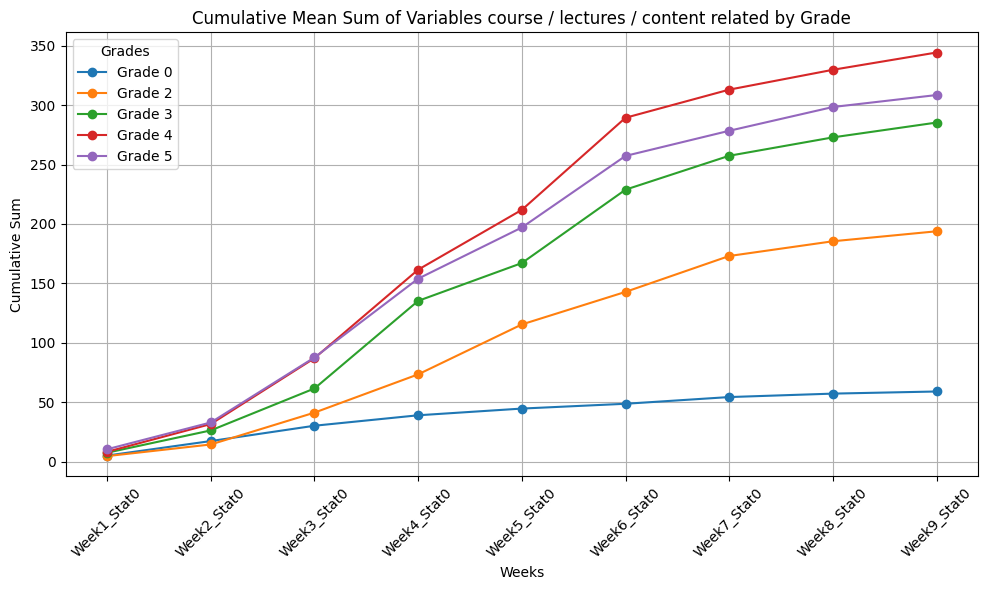

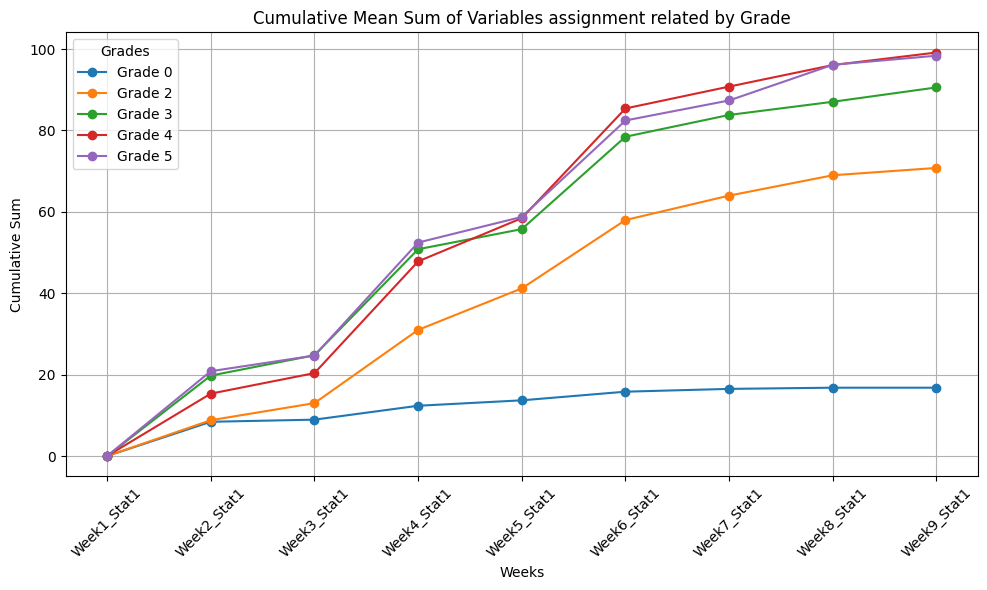

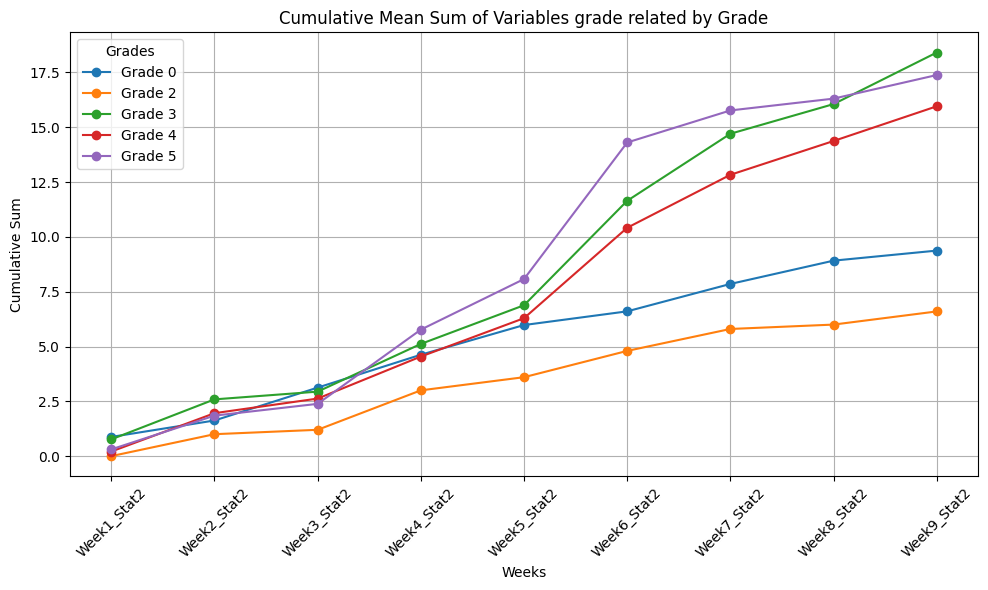

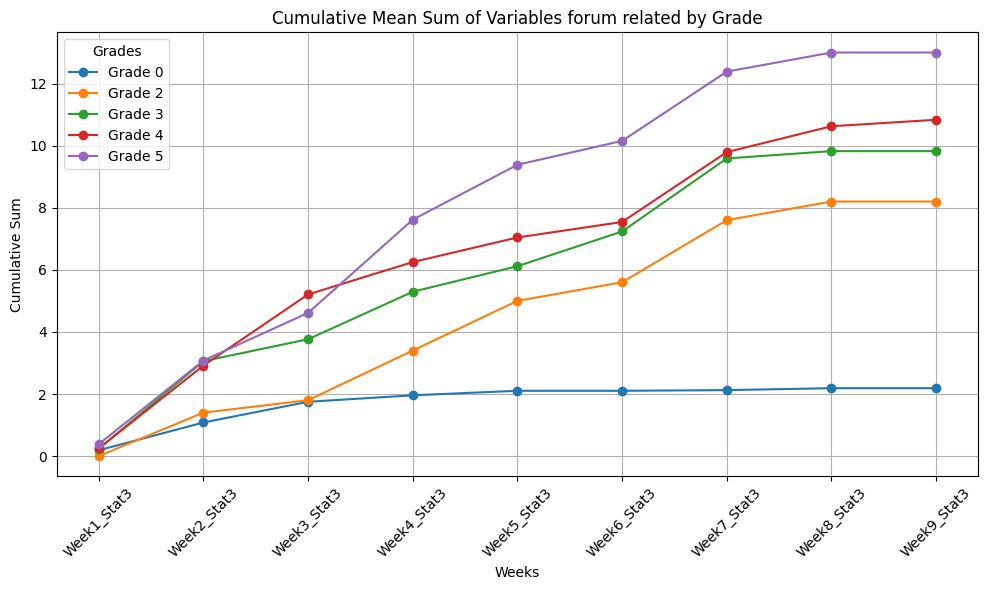

In [170]:
#plot the dataframes
def plot_fig(df,name):
  plt.figure(figsize=(10, 6))
  for grade in df.index:
      plt.plot(df.columns, df.loc[grade], marker="o", label=f"Grade {grade}")
  plt.title("Cumulative Mean Sum of Variables " + name + " by Grade")
  plt.xlabel("Weeks")
  plt.ylabel("Cumulative Sum")
  plt.xticks(rotation=45)
  plt.legend(title="Grades")
  plt.grid()
  plt.tight_layout()
  plt.show()


plot_fig(df_stat0,"course / lectures / content related")
plot_fig(df_stat1,"assignment related")
plot_fig(df_stat2,"grade related")
plot_fig(df_stat3,"forum related")


In [169]:
# check correlations to grade
q= df.drop(columns="ID")
corr = q.corr()
grade_corr = corr["Grade"].sort_values(ascending=False)
print(grade_corr)

Grade          1.000000
Week8_Total    0.972348
Week7_MP3      0.968130
Week5_MP2      0.953488
Week5_PR2      0.907837
Week3_MP1      0.901788
Week3_PR1      0.887352
Week7_PR3      0.865616
Week6_Quiz3    0.849920
Week4_Quiz2    0.810920
Week6_Stat1    0.771988
Week2_Quiz1    0.689783
Week4_Stat1    0.662946
Week3_Stat0    0.643789
Week6_Stat0    0.635807
Week4_Stat0    0.625359
Week3_Stat1    0.596824
Week5_Stat0    0.590146
Week8_Stat1    0.584425
Week9_Stat0    0.545532
Week9_Stat1    0.496753
Week5_Stat1    0.484030
Week8_Stat0    0.450807
Week7_Stat3    0.439733
Week7_Stat1    0.424807
Week2_Stat1    0.406120
Week7_Stat0    0.377195
Week2_Stat0    0.293296
Week2_Stat2    0.292262
Week6_Stat2    0.288761
Week4_Stat3    0.278034
Week6_Stat3    0.270239
Week5_Stat3    0.264079
Week1_Stat0    0.256311
Week8_Stat3    0.234907
Week3_Stat3    0.227106
Week2_Stat3    0.202950
Week4_Stat2    0.171987
Week9_Stat2    0.147822
Week9_Stat3    0.094227
Week7_Stat2    0.087466
Week5_Stat2    0

## Step 2 – Data split: Training and Test sets
Divide your data in an appropriate proportion to train and test dataset.

In [164]:
Y= df["Grade"]
high_corr= corr["Grade"][corr["Grade"]>0.50].index

high_corr = high_corr.drop("Grade")
X= df[high_corr]
#dropping week8_total
X = X.drop(columns= ["Week8_Total"])
#splitting data
X_train,X_test, Y_train, Y_test = train_test_split(X , Y, test_size= 0.20, random_state=0)
#scaling
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

## Step 3 – Model Training
Train two models to predict students’ final grade using two different approaches of your
choice. How accurately does your models predict the students’ final grade and how do these
models compare against each other? Which one is better? Could you explain why?



In [171]:

# Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Random forest classifier
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=0, min_samples_leaf=2, min_samples_split=2)
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=2, random_state=0)

## Step 4 – Performance Evaluation
How are your models performing? Do you need to change anything in your model? Visualize
the performance of your models.

In [172]:
# Predictions
lr_preds_train_rounded = np.round(lr_model.predict(X_train)).astype(int)
lr_preds_test_rounded = np.round(lr_model.predict(X_test)).astype(int)

rfc_preds_train_rounded = np.round(rfc_model.predict(X_train)).astype(int)
rfc_preds_test_rounded = np.round(rfc_model.predict(X_test)).astype(int)


print("Linear train accuracy: ",accuracy_score(Y_train,lr_preds_train_rounded))
print("Linear test accuracy: ",accuracy_score(Y_test,lr_preds_test_rounded))

print("Forest train accuracy: ",accuracy_score(Y_train,rfc_preds_train_rounded))
print("Forest test accuracy: ",accuracy_score(Y_test,rfc_preds_test_rounded))



Linear train accuracy:  0.9294117647058824
Linear test accuracy:  0.9545454545454546
Forest train accuracy:  1.0
Forest test accuracy:  0.8636363636363636


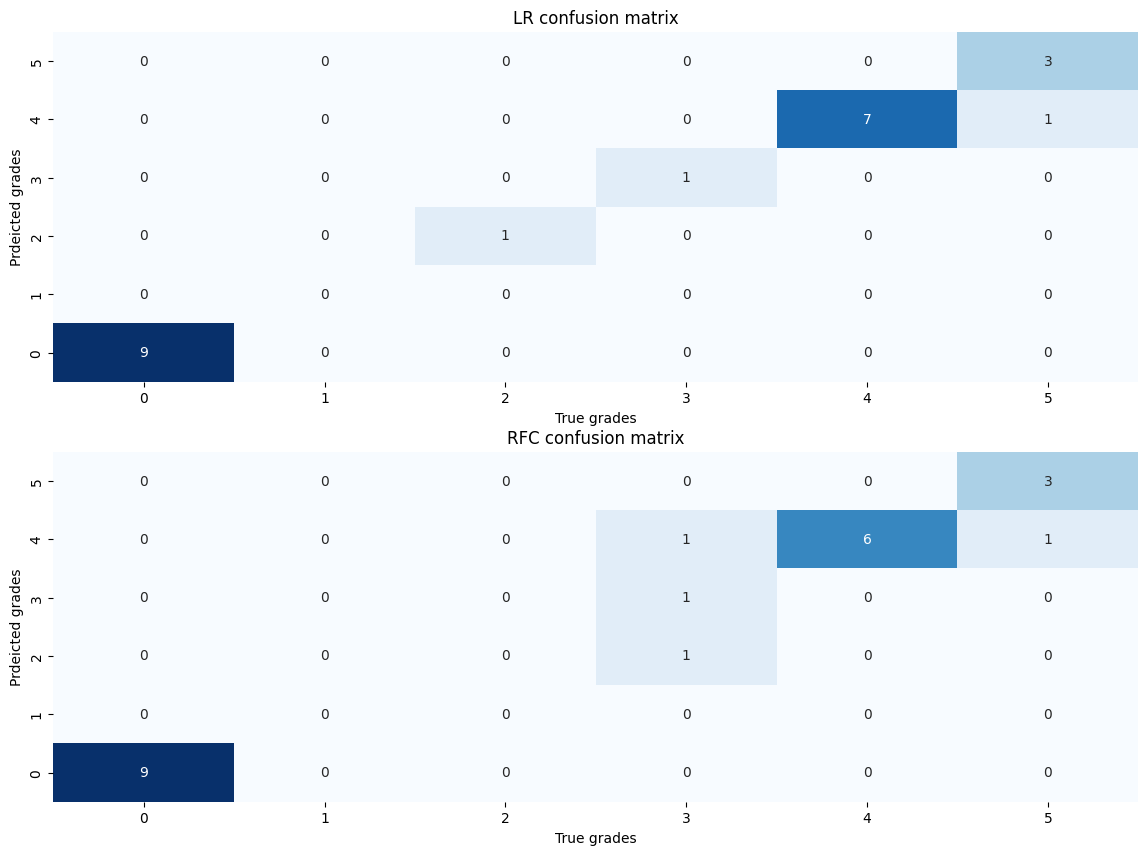

In [173]:




cm = confusion_matrix(Y_test, lr_preds_test_rounded, labels=[0, 1, 2, 3, 4, 5])
plt.figure(figsize=(14,10))
plt.subplot(2, 1, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0, 1, 2, 3, 4, 5],
            yticklabels=[0, 1, 2, 3, 4, 5])
plt.xlabel("True grades")
plt.ylabel("Prdeicted grades")
plt.title("LR confusion matrix")
plt.gca().invert_yaxis()

cm = confusion_matrix(Y_test, rfc_preds_test_rounded, labels=[0, 1, 2, 3, 4, 5])
plt.subplot(2, 1, 2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[0, 1, 2, 3, 4, 5],
            yticklabels=[0, 1, 2, 3, 4, 5])
plt.xlabel("True grades")
plt.ylabel("Prdeicted grades")
plt.title("RFC confusion matrix")
plt.gca().invert_yaxis()

plt.show()



## Step 5 – Important features
What are the three most important features in predicting students’ final grade?

In [168]:
importance_lr = abs(lr_model.coef_)
importance_rfc= abs(rfc_model.feature_importances_)

# Linear Regression feature importance
lr_importances = pd.Series(importance_lr, index=X.columns).sort_values(ascending=False)
print("Top 5 features in Linear Regression:\n",lr_importances.head(5))

rfc_importances = pd.Series(importance_rfc, index=X.columns).sort_values(ascending=False)
print("Top 5 features in Random Forest Classifier:\n",rfc_importances.head(5))


Top 5 features in Linear Regression:
 Week7_MP3    1.197870
Week5_MP2    0.821486
Week5_PR2    0.581199
Week3_MP1    0.321351
Week7_PR3    0.215285
dtype: float64
Top 5 features in Random Forest Classifier:
 Week7_MP3      0.189614
Week5_MP2      0.150349
Week3_MP1      0.099019
Week4_Quiz2    0.078068
Week5_PR2      0.077895
dtype: float64
